<a href="https://colab.research.google.com/github/vinayakbs311/predictive_model_for_genuine_note_identification_decesion_tree/blob/main/20_DT_on__bankNotes_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gini index: [0,0.5]
# Information Gain:[0,1]
# CART: Classification and regression Tree
# Decision Tree pruning: used to avoid overfitting 

## Problem Statement: Identify either note is Genuine or not using predictive modelling  and with the help of Decision tree

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('banknotes.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
# lets Create input and output data
X = df.drop(columns='Class')
X[:3]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210
2,3.8660,-2.6383,1.9242,0.10645


In [ ]:
y = df['Class']
y[:3]

0    0
1    0
2    0
Name: Class, dtype: int64

In [ ]:
y.value_counts()

0    762
1    610
Name: Class, dtype: int64

In [ ]:
len(y)

1372

In [ ]:
# splitting the dataset
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [ ]:
# Import Descision tree algo
#from sklearn.tree import DecisionTreeRegressor

# current problem is binary classification problem
# hence classifier wil be used
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
#trianing of data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
model.classes_

array([0, 1], dtype=int64)

In [ ]:
# prediction
y_pred = model.predict(X_test)
y_pred[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [ ]:
y_test[:5]

550     0
1073    1
1094    1
18      0
503     0
Name: Class, dtype: int64

In [ ]:
# Lets check trianing data score
model.score(X_train,y_train)*100

100.0

In [ ]:
model.score(X_test,y_test)*100

98.54545454545455

In [ ]:
#performance metrics
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[148,   0],
       [  4, 123]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       148
           1       1.00      0.97      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
model.criterion

'gini'

In [ ]:
# LEst apply entropy
model2 = DecisionTreeClassifier(criterion='entropy')

In [ ]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred2 = model2.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred2)

array([[148,   0],
       [  3, 124]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



# DT visualization

In [ ]:
from sklearn import tree

In [ ]:
X = df.iloc[:,:-1]
X[:2]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [ ]:
X.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

In [ ]:
model

DecisionTreeClassifier()

In [ ]:
#Build a text report showing the rules of a decision tree.
text_representation = tree.export_text(model,feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'])
print(text_representation)

|--- Variance <= 0.31
|   |--- Skewness <= 7.52
|   |   |--- Variance <= -0.46
|   |   |   |--- Curtosis <= 6.22
|   |   |   |   |--- Skewness <= 7.29
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Skewness >  7.29
|   |   |   |   |   |--- Curtosis <= 0.25
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Curtosis >  0.25
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Curtosis >  6.22
|   |   |   |   |--- Skewness <= -4.67
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Skewness >  -4.67
|   |   |   |   |   |--- Curtosis <= 6.61
|   |   |   |   |   |   |--- Skewness <= -2.23
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Skewness >  -2.23
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Curtosis >  6.61
|   |   |   |   |   |   |--- class: 0
|   |   |--- Variance >  -0.46
|   |   |   |--- Curtosis <= 0.30
|   |   |   |   |--- Skewness <= 5.58
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Skewness >  5

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
np.unique(y)

array([0, 1], dtype=int64)

In [ ]:
model.classes_

array([0, 1], dtype=int64)

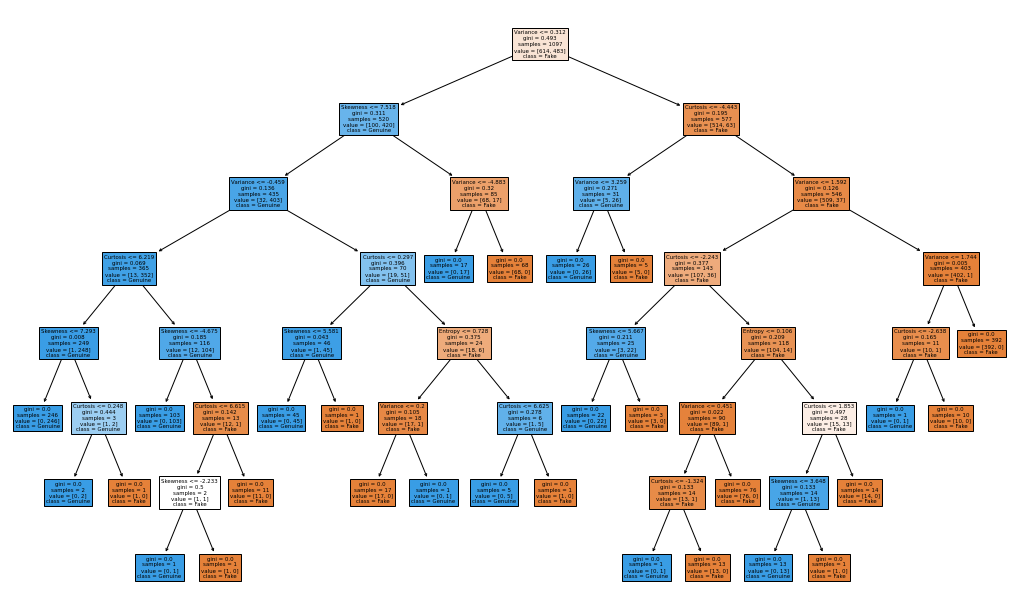

In [ ]:
fig = plt.figure(figsize=(18,11))
_ = tree.plot_tree(model, 
                   feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'],  
                   class_names=['Fake','Genuine'],
                   filled=True)
plt.savefig('sample_20.png',dpi=120)

In [ ]:
len(X_train)

1097

In [ ]:
plt.figure(figsize=(12,12))
tree.plot_tree(model, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score?

In [ ]:
# different scoring options
#https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options

In [ ]:
model

DecisionTreeClassifier()

In [ ]:
X[:4]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210
2,3.8660,-2.6383,1.9242,0.10645
3,3.4566,9.5228,-4.0112,-3.59440


In [ ]:
y[:4]

0    0
1    0
2    0
3    0
Name: Class, dtype: int64

In [ ]:
y.unique()

array([0, 1], dtype=int64)

In [ ]:
X.shape

(1372, 4)

In [ ]:
cv_score = cross_val_score(model,X,y)
#default cv value is =5
cv_score

array([0.98545455, 0.96727273, 0.98175182, 0.98540146, 0.98540146])

In [ ]:
model.score(X_test,y_test)

0.9854545454545455

In [ ]:
cv_score.mean()*100

98.1056403450564

In [ ]:
#lets try Logistic regression over same data and check cross_val_score
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [ ]:
cv_3 = cross_val_score(LR,X,y,cv=3)
cv_3

array([0.98908297, 0.9868709 , 0.99343545])

In [ ]:
cv_3.mean()

0.989796438388452

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
cross_val_score(GaussianNB(),X,y).mean()*100

83.82057067020571

## we have 2 options: 
# Stratified Kfold 
# Kfold cross validation

In [ ]:
[0,1,2,3,4,5,6,7]
Train: [1 2 3 5 6 7] | test: [0 4]
Train: [0 2 3 4 6 7] | test: [1 5]
Train: [0 1 3 4 5 7] | test: [2 6]
Train: [0 1 2 4 5 6] | test: [3 7]
StratifiedKFold done

Train: [2 3 4 5 6 7] | test: [0 1]
Train: [0 1 4 5 6 7] | test: [2 3]
Train: [0 1 2 3 6 7] | test: [4 5]
Train: [0 1 2 3 4 5] | test: [6 7]
KFold done

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [ ]:
X = np.array([
    [1,2,3,4],
    [11,12,13,14],
    [21,22,23,24],
    [31,32,33,34],
    [41,42,43,44],
    [51,52,53,54],
    [61,62,63,64],
    [71,72,73,74]
])

y = np.array([0,0,0,0,1,1,1,1])

In [ ]:
kf = KFold(n_splits=4)
# default  n_split=5

In [ ]:
kf.split(X)

In [ ]:
list(kf.split(X))

In [ ]:
skf = StratifiedKFold(n_splits=4)
skf

In [ ]:
skf.split(X,y)

In [ ]:
list(skf.split(X,y))
#[array(training_index),array(test_index)]

In [ ]:
for train_index,test_index in skf.split(X,y):
    print(train_index,test_index)

In [ ]:
for train_index,test_index in skf.split(X,y):
    print(X[train_index],X[test_index])# X_train,X_test

In [ ]:
X

# Hyperparameter tuning using GridSearch CV

In [ ]:
DecisionTreeClassifier?

In [ ]:
m1 = DecisionTreeClassifier()
m1.fit(X_train,y_train)
print(m1.score(X_train,y_train)*100)
print(m1.score(X_test,y_test)*100)

In [ ]:
#lets change some parameter values
m2 = DecisionTreeClassifier(criterion='entropy',
    splitter='random',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.5)
m2.fit(X_train,y_train)
print(m2.score(X_train,y_train)*100)
print(m2.score(X_test,y_test)*100)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
pr_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[2,3,4,5,6,8],
    'min_samples_split':[2,3],
    'min_samples_leaf':[1,2],
    'min_weight_fraction_leaf':[0.0,0.2,0.4,0.5]
    } 

In [ ]:
pr_grid

In [ ]:
"""
GridSearchCV(
    estimator,
    param_grid,
"""
out = GridSearchCV(DecisionTreeClassifier(),pr_grid)

In [ ]:
out

In [ ]:
X[:2]

In [ ]:
y = df.Class
y[:2]

In [ ]:
# Train ove X and Y using GridSearchCV object
out.fit(X,y)

In [ ]:
out.best_params_

In [ ]:
pr_grid

In [ ]:
out.best_estimator_

In [ ]:
final = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=3)

In [ ]:
final.fit(X,y)

In [ ]:
final.score(X,y)*100

In [ ]:
final.score(X_train,y_train)*100

In [ ]:
final.score(X_test,y_test)*100

# Serialization

## Module Interface : 
 

- dumps() – This function is called to serialize an object hierarchy.
- loads() – This function is called to de-serialize a data stream.

In [ ]:
import pickle

In [ ]:
final.predict([[2.3,1.2,1.1,4.5]])

In [ ]:
# save the DT_model to disk
filename = 'DT.pickle'
pickle.dump(final, open(filename, 'wb'))

# De Serialization

In [ ]:
# end user/testing  team/ client/ devops team will use pickled file
check = pickle.load(open('DT.h5','rb'))
check

In [ ]:
s = 'python'
k = ''
for i in s:
    k = i + k
print(k)

In [ ]:
s #-1,-2,-3,..-6

In [ ]:
for i in range(-1,- (len(s)+1),-1):
    print(s[i],end='')

In [ ]:
*
**
***
****
*****

In [ ]:
[print(i*'*') for i in range(1,6)]